# Overview

The file *src/models/compare_methods.py* runs through a number of k-fold cross validations for different classification methods. Below are the f1, precistion, and recall statistics for those model runs. The *train_sample.csv* was used for the k-fold cross validation.

In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
scores = pd.read_csv("../models/sample_scores.csv")
scores.groupby("model").agg(['mean', 'std'])

precision              recall                  f1  \
                         mean       std      mean       std      mean   
model                                                                   
Decision Tree        0.361667  0.111363  0.138594  0.060188  0.194207   
Logistic Regression  0.000000  0.000000  0.000000  0.000000  0.000000   
Random Forest        0.190000  0.389793  0.003577  0.007710  0.007008   

                               
                          std  
model                          
Decision Tree        0.065842  
Logistic Regression  0.000000  
Random Forest        0.015069

The Logistic Regression threw a *UndefinedMetricWarning* at each iteration. This is on my TODO list for digging into. For now, I will drop that classification method and focus on the Decision Tree & Random Forest.

In [3]:
scores = scores[scores['model'] != 'Logistic Regression'].reset_index(drop=True)

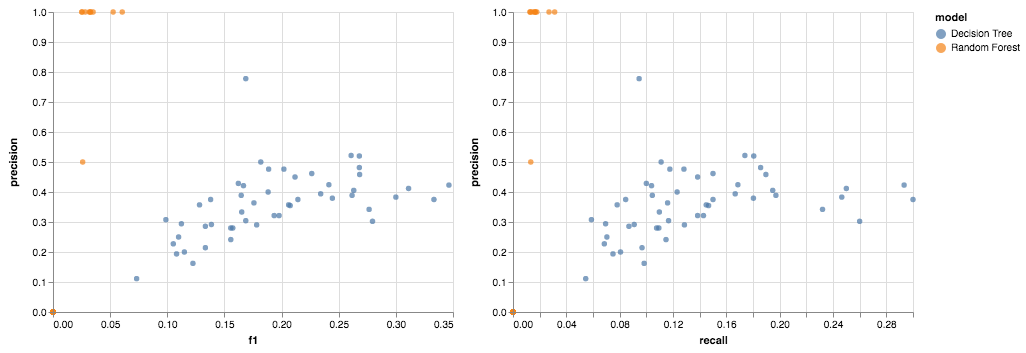

In [4]:
base = alt.Chart(scores).mark_circle().encode(
    alt.Y('precision:Q'),
    alt.Color('model:N')
)


left = base.encode(alt.X('f1:Q'))
right = base.encode(alt.X('recall:Q'))

left | right

Given the class imbalance between 0 and 1, the above models have a large amount of false negatives. E.g. we are predicting that an observation will not result in a click / download when in reality it does. 

To deal with the class imbalance, I am going to under-sample observations which belong to class 0.